In [1]:
import xarray as xr
import csv
from pathlib import Path
import os
import pandas as pd

impulseLogfilePath = Path("LOGFILE PATH GOES HERE")
impulseDF = pd.read_csv(impulseLogfilePath, infer_datetime_format=True)

dataVars = {}

for column in impulseDF.columns[2:]:
    columnName = column.replace(" ","_")
    dataVars[columnName]= xr.DataArray(impulseDF[column], dims=("Experiment_time"), coords={"Experiment_time":impulseDF['Experiment time'].tolist()})

impulseXR = xr.Dataset(
                    data_vars=dataVars,
                    coords={
                        "Experiment_time": impulseDF['Experiment time'].tolist()
                    },
                    attrs={
                        "Logfile":os.path.splitext(impulseLogfilePath.name)[0],
                        "Folder":os.path.dirname(impulseLogfilePath)
                    }
                )

impulseXR

<xarray.Dataset>
Dimensions:                         (Experiment_time: 41242)
Coordinates:
  * Experiment_time                 (Experiment_time) float64 12.7 ... 7.738e+03
Data variables: (12/38)
    Temperature_Setpoint            (Experiment_time) float64 21.0 ... 300.0
    Temperature_Measured            (Experiment_time) float64 20.6 ... 300.0
    Measured_power                  (Experiment_time) float64 0.015 ... 4.283
    Relative_power_reference        (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Relative_power                  (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    MFC1_Measured                   (Experiment_time) float64 0.0 0.0 ... 0.2499
    ...                              ...
    Channel#5                       (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Channel#6                       (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Channel#7                       (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Channel#8                       (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Channel#9                       (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
    Channel#10                      (Experiment_time) int64 0 0 0 0 ... 0 0 0 0
Attributes:
    Logfile:  DataForTimeDelayScript_Synchronized data
    Folder:   C:\Users\merijn\Desktop\DataForTimeDelayScript

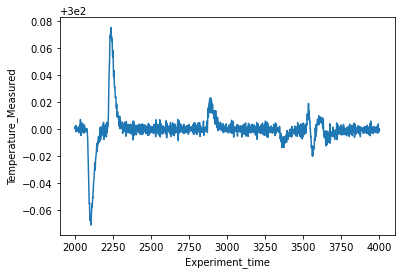

In [2]:
impulseXR.Temperature_Measured.sel(Experiment_time=slice(2000, 4000)).plot()